## Project's Description

**Content**
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries <br>

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. <br>

In this project we have considered data from year 2000-2015 for 193 countries for further analysis. The final dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables.

**Variable Descriptions **<br>
1. **country** (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo) <br>
2. **year**(Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015) <br>
3. **status** (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
4. **life_expectancy** (Ratio) - the life expectancy of people in years for a particular country and year
5. **adult_mortality** (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

6. **infant_deaths** (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

7. **alcohol**(Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

8. **percentage_expenditure** (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
9. **hepatitis_b** (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
10. **measles** (Ratio) - number of reported Measles cases per 1000 population
11. **bmi** (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
12. **under-five_deaths** (Ratio) - number of people under the age of five deaths per 1000 population
13. **polio** (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
14. **total_expenditure** (Ratio) - government expenditure on health as a percentage of total government expenditure
15. **diphtheria** (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
16. **hiv/aids** (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
17. **gdp** (Ratio) - Gross Domestic Product per capita
18. **population** (Ratio) - population of a country
19. **thinness_1-19_years** (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
20. **thinness_5-9_years** (Ratio) - rate of thinness among people aged 5-9
21. **income_composition_of_resources** (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. **schooling** (Ratio) - average number of years of schooling of a population



**Intro** <br>
..... Today we will be  DA consultants for WHO. In particular WHO is interested what is the difference in general health indicators between developed and developing countries, especially in terms of economic development/expenditure and immunization.  Also WHO's previous approach included BMI and body weight related measures, but now they're sure that averages of these indicators are the same for both categories, thus, these parameters should not be included in their methodology anymore. 

Today  and on the next workshop we will:
1. See how average life expectancy is different for developed/developing countries
2. Identify countries that are in "risk" zone for mortality.
3. Try to find a paradox in GDP vs expenditure on health within developed/developing
4. Create a "profile analysis" for immunization in developed/developing countries 
5. Check whether BMI and body weight related measure should be included in the methodology of WHO 

**Why WHO needs that?**
One of the goals of WHO is helping countries in creating better health programs. Over the years they've created several methods on analyzing which parameters work better/worse for specific countries. They have already filtered out some of the parameters that they're particular interested what is the difference in general health indicators between developed and developing countries, especially in terms of economic development/expenditure and immunization. If WHO knows which indicators are the same for two types of countires and which are different, it will help them to adjust recommendations for types of countries, make them more unique.

In [1]:
# needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
import seaborn as sns

In [2]:
data=pd.read_csv('Life Expectancy Data.csv',sep=',')

In [3]:
#renaming columns
data.columns=data.columns.str.lower()
data.columns=data.columns.str.replace(' ','_')

In [4]:
data.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.groupby(['status'])['country'].nunique()

status
Developed      32
Developing    161
Name: country, dtype: int64

### EDA

In [6]:
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy_                    10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles_                             0
_bmi_                               34
under-five_deaths_                   0
polio                               19
total_expenditure                  226
diphtheria_                         19
_hiv/aids                            0
gdp                                448
population                         652
_thinness__1-19_years               34
_thinness_5-9_years                 34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [7]:
len(data[data.isnull().any(axis=1)])/len(data)

0.4387338325391423

43% of rows has at least one missing value. Since we're gonna use a lot of parameters, won't drop /replace missing values

In [8]:
data.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
year,2938,2007,4,2000,2004,2008,2012,2015
life_expectancy_,2928,69,9,36,63,72,75,89
adult_mortality,2928,164,124,1,74,144,228,723
infant_deaths,2938,30,117,0,0,3,22,1800
alcohol,2744,4,4,0,0,3,7,17
percentage_expenditure,2938,738,1987,0,4,64,441,19479
hepatitis_b,2385,80,25,1,77,92,97,99
measles_,2938,2419,11467,0,0,17,360,212183
_bmi_,2904,38,20,1,19,43,56,87
under-five_deaths_,2938,42,160,0,0,4,28,2500


### **Task 1:** How is life expectancy distributed?What is the world average life expectancy ? Is it the same for our categories? How are they different?

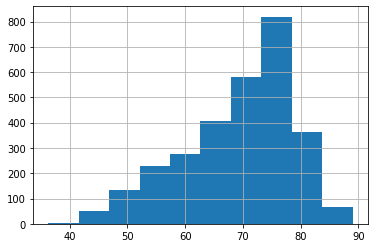

In [9]:
data.life_expectancy_.hist()

In [10]:
print(data.life_expectancy_.mean())
print(data.life_expectancy_.median())

69.22493169398912
72.1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa908af5c10>,
      dtype=object)

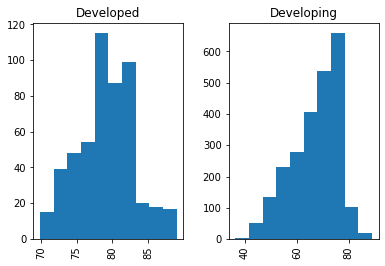

In [11]:
data.life_expectancy_.hist(by=data['status'])

In [12]:
data.groupby(['status'])['life_expectancy_'].agg(['mean','median']).reset_index()

,status,mean,median
0,Developed,79.197852,79.25
1,Developing,67.111465,69.00


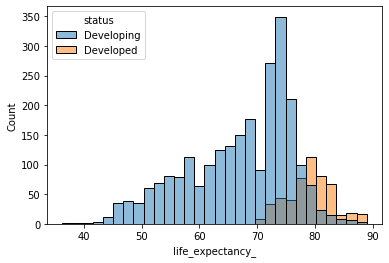

In [13]:
import seaborn as sns
sns.histplot(data, x="life_expectancy_", hue="status")

Since distribution are close to normal, mean and median should be close to each other. That's what we see in the table also. In this case we can choose either mean or median

**Conclusion on life expectancy for WHO:** <br>
The average life expectancy for all data is 72 years, however the distribution is not normal and looks differenct for both types of countries. While for developed countries the expectancy 'starts' from 70s, for developing it can be lower than 40 and the difference in average life expectancy is 10 years. That is a big difference that should be reduced, so WHO needs to help developing countries to catch up

### Task 2:<br> Identify  risky countries in terms of mortality

**Which countries are in risk zones in terms of mortality? What is average mortality overall? By category?**<br>
 Country is in the risk zone if it's above higher average mortality rate.<br>
 **Find countries that are not in the risk zone overall but have higher than average mortality rate per group.**

"*Let's start by taking a look at distribution of mortality rate per group*"

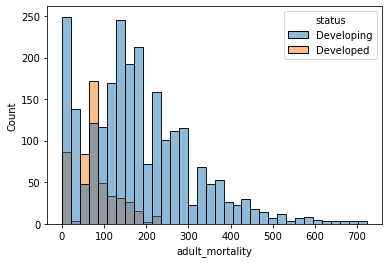

In [14]:
sns.histplot(data, x="adult_mortality", hue="status")

"*What does this long tail mean for developing countries? Can you guess what is going to be bigger mean or median? Can you guess what group will have bigger difference mean vs median?*"

In [15]:
data.groupby(['status'])['adult_mortality'].agg(['mean','median'])

,mean,median
status,,
Developed,79.685547,73.0
Developing,182.833195,163.0


"*What is bigger - mean or median?For both cases ,mean, so it's positive skew (tail to the right)*"

Now let's identify risky countries. For that let's create parameters that will represent average overall mortality rate and per group

In [16]:
overall_median=data.adult_mortality.median()
overall_median

144.0

In [17]:
developed_median=data.query('status=="Developed"')['adult_mortality'].median()
developing_median=data.query('status=="Developing"')['adult_mortality'].median()
print(developed_median)
print(developing_median)

73.0
163.0


In [18]:
data.query('status=="Developed" and adult_mortality<@overall_median and adult_mortality>@developed_median')['country'].unique()


array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia',
       'Czechia', 'Denmark', 'Germany', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [19]:
data.query('status=="Developing" and adult_mortality<@overall_median and adult_mortality>@developing_median')['country'].unique()


array([], dtype=object)

can't  use the same approach as for developed, cause median per  developing group is already higher than median overall, so we just should take above average per group

In [20]:
data.query('status=="Developing" and adult_mortality>@developing_median')['country'].nunique()

105

In [21]:
data.query('status=="Developing"')['country'].nunique()

161

**Conclusion for WHO:**<br>
Mortality rate is one of the parameters that tells us how dangerous this difference between two types of countries may be. Not only developing countries have on average twice as  big as mortality rate as developed countries, we also have a lot of countries in the risk zone

## **Task 3: Economics analysis**. How GDP  varies for all countries? Within a group? Is it the same for expenditure?

In [22]:
data.gdp.std()


14270.16934151599

In [23]:
data.gdp.describe()

count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: gdp, dtype: float64

Can you guess the direction of skewness based on relationship between mean and median ?

Ok, back to std in describe method. We see that it is 14 270, but is it a lot? How do we know if variation is big? <br> Coefficient of variation (CV=standard deviation / mean): CV>1 = high variation

In [24]:
cv=data.gdp.std()/data.gdp.mean()
cv

1.9069714212745892

But what's gonna happen when we split gdp per groups? 

In [25]:
data.groupby(['status'])['gdp'].std()/data.groupby(['status'])['gdp'].mean()

status
Developed     1.037066
Developing    2.046507
Name: gdp, dtype: float64

Now we see that while developed countries on average have "about the same" GDP, developing countries have many different options :D  <br> 

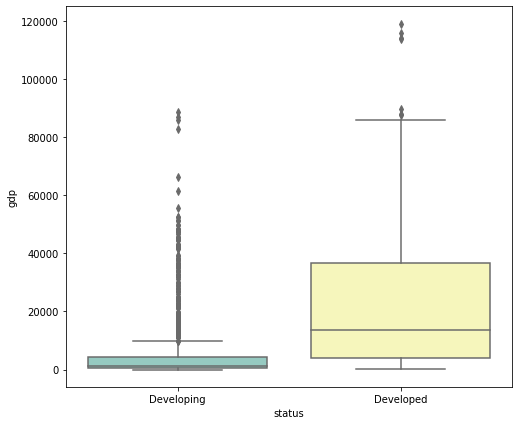

In [26]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='status',y="gdp",
                 data=data, palette="Set3")

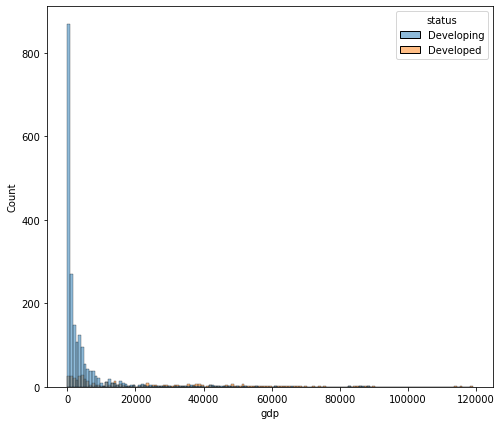

In [27]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(data, x="gdp", hue="status")


In [28]:
data.groupby(['status'])['gdp'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Developed,448.0,22053.386446,22870.827763,12.27733,3875.74091,13560.723860,36760.425993,119172.74180
Developing,2042.0,4286.556053,8772.467789,1.68135,382.74983,1246.021671,4147.739877,88564.82298


Now let's take a look how  boxplot for normal distribution looks like. Let's take schooling  parameter for example

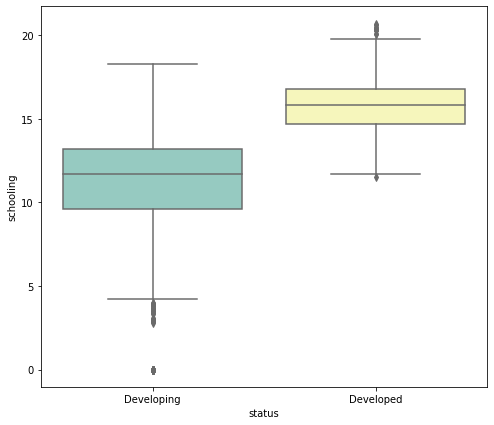

In [29]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='status',y="schooling",
                 data=data, palette="Set3")

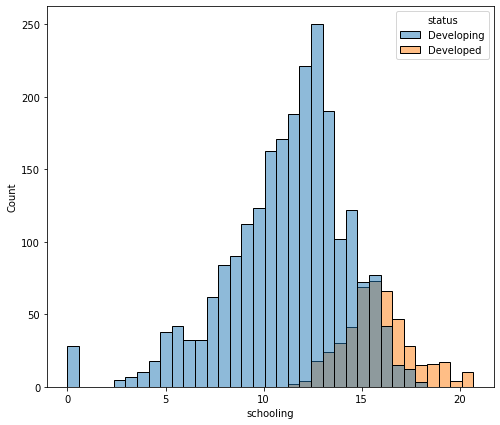

In [30]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(data, x="schooling", hue="status")

How does expenditure vary? Overall? Per Group?

In [31]:
data.groupby(['status'])['total_expenditure'].std()/data.groupby(['status'])['total_expenditure'].mean()

status
Developed     0.395072
Developing    0.399549
Name: total_expenditure, dtype: float64

In [32]:
data.groupby(['status'])['total_expenditure'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Developed,480.0,7.554042,2.984389,1.10,6.4075,7.895,9.2125,17.60
Developing,2232.0,5.590694,2.233756,0.37,4.1400,5.400,6.8300,17.24


The conclusion is that expenditure as % doesn't vary a lot neither overall, nor between groups. Also, there is no big difference between expenditure of developed and developing countries in relative terms. That means,that % doesn't pay much role, but absolute summ of expenditure does ( here is our paradox). And this is the first recommendation: there is no big difference in % of expenditure, but there is on total expenditure, so %of expenditure as a parameter is not that important to models/programs for WHO

## Task 4: Analysis of immunization

**For each country find  and average immunization rate for all years. Calculate the mean, dispersion, standard deviation. Plot histograms, describe how distributions varies among two groups of countries**

In [33]:
data.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [34]:
immunization=data.groupby(['country','status'])['hepatitis_b','diphtheria_','polio'].mean().reset_index()
immunization

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,status,hepatitis_b,diphtheria_,polio
0,Afghanistan,Developing,64.562500,52.3125,48.3750
1,Albania,Developing,98.000000,98.0625,98.1250
2,Algeria,Developing,78.000000,91.8750,91.7500
3,Angola,Developing,70.222222,47.6875,46.1250
4,Antigua and Barbuda,Developing,98.266667,98.3125,96.9375
...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),Developing,66.250000,68.5000,74.6875
189,Viet Nam,Developing,87.538462,91.7500,94.9375
190,Yemen,Developing,55.687500,72.6250,67.1250
191,Zambia,Developing,69.818182,74.2500,64.3750


This is just an example of function

In [36]:
def immunization_stat(vaccine):
    fig, ax = plt.subplots(figsize=(8,7))
    ax = sns.histplot(immunization, x=vaccine, hue="status")
    mean=immunization[vaccine].mean()
    std=immunization[vaccine].std()
    var=immunization[vaccine].var()
    cv=std/mean
    plt.show()
    print("Average is",mean)
    print(immunization.groupby(['status'])[vaccine].mean())
    if cv>1:
        print("Varies a lot")
    else:
        print('Centered around average')

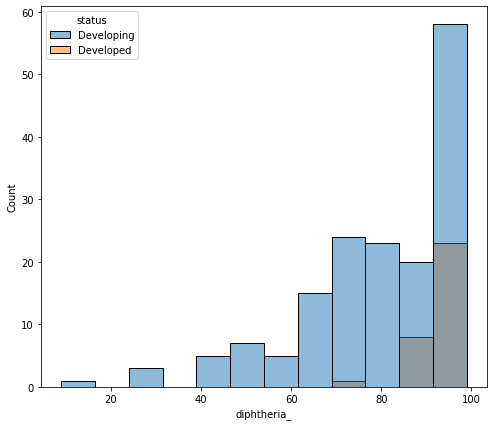

Average is 82.22844189489267
status
Developed     93.476562
Developing    79.992791
Name: diphtheria_, dtype: float64
Centered around average


In [37]:
immunization_stat('diphtheria_')

Answer the following questions:
1. Which vaccine out of all 3 has the highest average immunization rate across all countries.
2. Which vaccine has the lowest rate in developing countries?

### Task 5: Checking WHO's hypothesis on whether averages of body weight indicators are the same for developed and developing countries

"*First, what parameters should we take? What parameters belong to  body weight indicators?*" 

In [38]:
bmi=data[['country','status','_bmi_','_thinness__1-19_years','_thinness_5-9_years']]
bmi.head()

,country,status,_bmi_,_thinness__1-19_years,_thinness_5-9_years
0,Afghanistan,Developing,19.1,17.2,17.3
1,Afghanistan,Developing,18.6,17.5,17.5
2,Afghanistan,Developing,18.1,17.7,17.7
3,Afghanistan,Developing,17.6,17.9,18.0
4,Afghanistan,Developing,17.2,18.2,18.2


Let's formulate hypothesis that we're going to check. In statistical testing we're calling it Null Hypothesis, it's always about equality of the groups, or that the difference between two groups is equal to zero (null, thus the name of hypothesis)

Let's start with the first parameter: BMI index. 
Null Hypothesis will be smth like  <br>
"*Average yearly BMI index of Developed countries is equal to Average yearly BMI index of Developing  countries*"

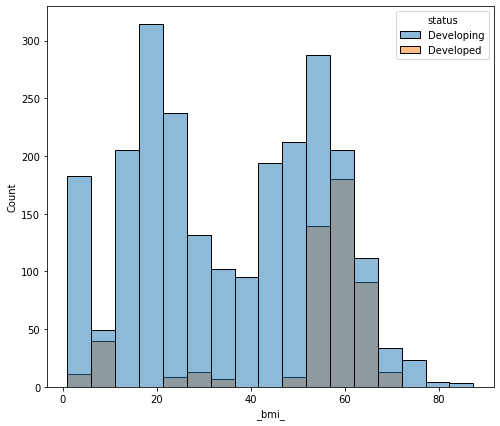

In [39]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(bmi, x="_bmi_", hue="status")

Not normal, should use median

In [40]:
bmi.groupby(['status'])['_bmi_'].median()

status
Developed     57.45
Developing    35.20
Name: _bmi_, dtype: float64

The difference between groups in median is actually pretty big, so the null hypothesis of WHO is wrong. 
<br> "*What do we suggest to WHO regarding the hypothesis* ? 
<br> "Can't exclude bmi from the model, cause it's different for the groups

check other two parameters also and make a conclusion whether they're also different and we should not exclude them

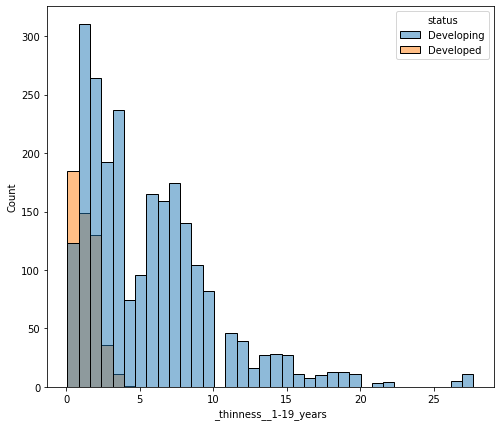

In [41]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(bmi, x="_thinness__1-19_years", hue="status")

In [42]:
bmi.groupby(['status']).median()

,_bmi_,_thinness__1-19_years,_thinness_5-9_years
status,,,
Developed,57.45,1.1,1.0
Developing,35.20,4.5,4.6


In [43]:
data.groupby(['status']).median().T.astype(int)

status,Developed,Developing
year,2007,2008
life_expectancy_,79,69
adult_mortality,73,163
infant_deaths,0,6
alcohol,10,2
percentage_expenditure,846,48
hepatitis_b,95,91
measles_,12,18
_bmi_,57,35
under-five_deaths_,0,7


"*While for some parameters the difference in average  is obvious, for others, like hepatitis_b  is not. In statistics we never just do the comparison on average, because average (even median) doesn't fully represent the distribution. To prove that averages are not the same between groups we're using hypothesis testing which we will cover in the next workshop...*"

**General conclusion** <br>
We took a look at several parameters for different countries and found out that: <br>
1.  While for developed countries the expectancy 'starts' from 70s, for developing it can be lower than 40 and the difference in average life expectancy is 10 years. That is a big difference that should be reduced, so WHO needs to help developing countries to catch up. <br>
2. Mortality rate is one of the parameters that tells us how dangerous this difference between two types of countries may be.<br>
3. There is no big difference in % of expenditure, but there is a big one on absolute expenditure, so % of expenditure as a parameter is not that important to models/programs for WHO
4. BMI and other weight indicators shouldn't be excluded from the models/recommendation, cause they're different for developed and developinc countries


## Task 5: Hypothesis Testing

**What statistical test should we use to compare two groups together?**

"since we have limited number of countries and limites number of years - we're working with samples"

"What would be population for this dataset? How it would look like?" <br>
**Answer:** "Data (parameters) for all years for all countries"

Define two datasets for samples of "developed" and "developing" countries. 

In [46]:
developed=data.query('status=="Developed"')
developing=data.query('status=="Developing"')

Ok, samples are defined. Any chosen column can be sample. Let's get back to out BMI identificator. <br>
We've already stated Null Hypothesis : <br>
**"Average yearly BMI index of Developed countries is equal to Average yearly BMI index of Developing countries"**<br> What other Hypothesis do we need? What is the opposite to this statement? 

**H0:** "Average yearly BMI index of Developed countries is equal to Average yearly BMI index of Developing countries" <br>
**HA:** "Average yearly BMI index of Developed countries does not equal to Average yearly BMI index of Developing countries"

Once we've defined hypothesis, what do we do with them? <br>

In [62]:
sample1=developed['_bmi_']
sample2=developing['_bmi_']

In [49]:
from scipy import stats
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=nan, pvalue=nan)

Oops? What happened? ttest_ind returns nan in pvalue if you have missing values in samples. You can omit them using nan_policy parameter

In [51]:
stats.ttest_ind(sample1, sample2,nan_policy='omit')

Ttest_indResult(statistic=17.643952644772682, pvalue=2.8967701146843295e-66)

In [52]:
results = stats.ttest_ind(sample1, sample2,nan_policy='omit')
results.pvalue

2.8967701146843295e-66

**"So do we reject or fail to reject our Null Hypothesis?"**

Now we have a statistical proof that bmi is not the same for developed and developing countries and thus, should be included  as a parameter in the models/recommendations of WHO. Let's create a function that will make our testing easier

In [57]:
def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit').pvalue
    print("p-value:",p_value)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same") 

In [58]:
t_test(developed['_thinness_5-9_years'],developing['_thinness_5-9_years'],alpha=0.05)

p-value: 3.761954753913859e-93
Reject H0: average of sample 1 is not equal to average of sample 2


**Requirements of t-test, most importantly, about normality and equality of variance.** <br>
"While normality is not that of a strict requirement and t-test can handle slightly abnormal data, the equality of variance should be checked. Stats.ttest_ind even have special parameter for that.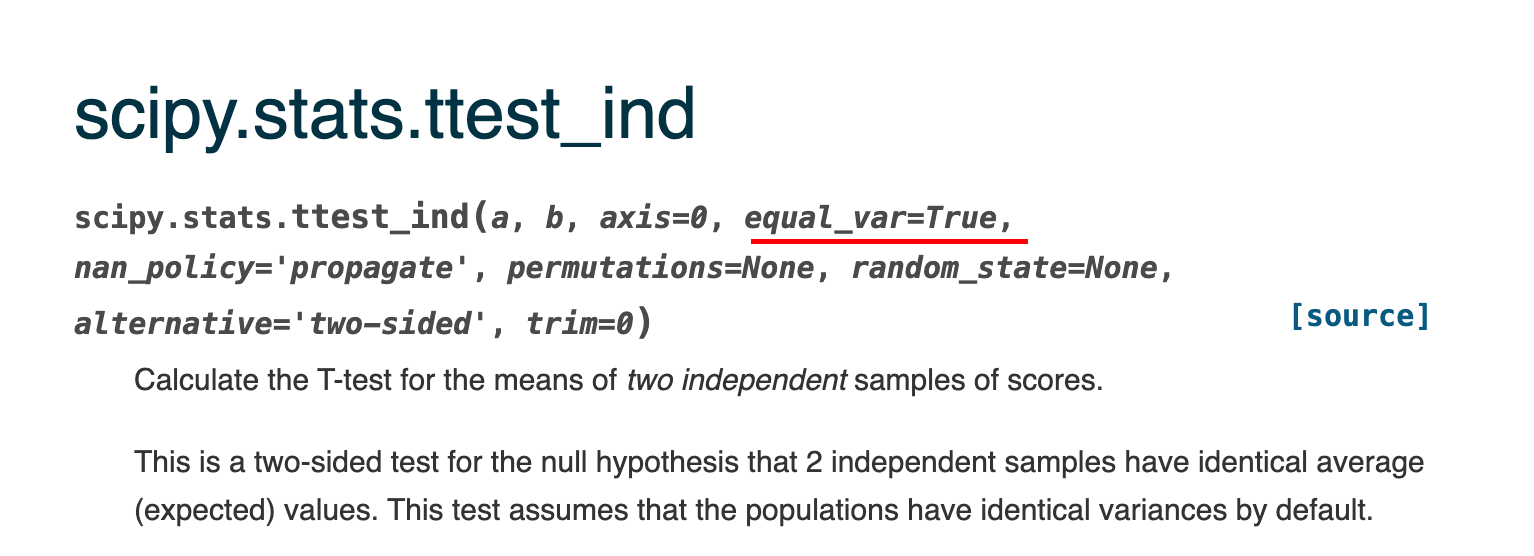

**But how do we define if variances are true or not?** <br>
We can use special test for that : **Levene test**. 
It works just like t-test, but instead of checking averages, it checks the variances
        

In [64]:
p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)
alpha = 0.05
if p_value_levene<alpha:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 and sample 2 are not the same") 

Reject H0: variance of sample 1 is not equal to variance of sample 2


Let's include that in our function, so that our testing is more accurate

In [65]:
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue.astype(int)
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=option_var).pvalue.astype(int)

    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same") 
        

In [66]:
t_test(developed['_thinness__1-19_years'],developing['_thinness__1-19_years'],alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


Now we have a function that can test differences between developed and developing countries for all parameters! <br>
we can iterate over all of them and find out which parameters are equal and we can exclude them from the model

In [67]:
for i in data.columns:
    if i in ['country','year','status']:
        continue
    else:
        print(i)

life_expectancy_
adult_mortality
infant_deaths
alcohol
percentage_expenditure
hepatitis_b
measles_
_bmi_
under-five_deaths_
polio
total_expenditure
diphtheria_
_hiv/aids
gdp
population
_thinness__1-19_years
_thinness_5-9_years
income_composition_of_resources
schooling


In [68]:
for i in data.columns:
    if i in ['country','year','status']:
        continue
    else:
        print('Reslut for :',i)
        t_test(developed[i],developing[i],alpha=0.05)
        print('----------------------------')

Reslut for : life_expectancy_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : adult_mortality
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : infant_deaths
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : alcohol
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : percentage_expenditure
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : hepatitis_b
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : measles_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : _bmi_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : under-five

Great! We successfully ran an hypothesis testing on all the parameters <br>
and now we know , that we **can't exclude anything from the model**, since all of the parameters are indeed different for two types of countries

But, while groups are different in the parameters, WHO also wants to know whether the "cut off" that they make in determing whether country is developed or developing is accurate. They have doubts and think that maybe top developing and worst developed countries are not that far from each other. Let's check that also


- Define top developing country and worse developed country based on max and min gdp in the group accordingly. 
- create sample datasets with all parameters only for these countries
- check the differences between these two countries in all of the parameters
- conclude whether these countries are really different and WHO's methodology works. If they're the same, in which way?

In [73]:
b_depd_country=developed[developed.gdp==developed.gdp.min()]['country'].iloc[0]
b_depd_country

'Romania'

In [72]:
t_deping_country=developing[developing.gdp==developing.gdp.max()]['country'].iloc[0]
t_deping_country

'Qatar'

In [74]:
bottom_developed=developed.query('country==@b_depd_country')
top_developing=developing.query('country==@t_deping_country')

In [75]:
bottom_developed.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
2119,Romania,2015,Developed,75.0,133.0,2,NaN,0.000000,9.0,4,...,89.0,NaN,89.0,0.1,8958.788593,19815481.0,2.5,2.7,0.798,14.7
2120,Romania,2014,Developed,74.8,135.0,2,0.01,1.576409,94.0,59,...,94.0,5.57,94.0,0.1,12.277330,1998979.0,2.6,2.8,0.797,14.7
2121,Romania,2013,Developed,74.6,138.0,2,9.59,1230.748231,96.0,1159,...,88.0,5.60,92.0,0.1,9585.266593,19983693.0,2.7,2.9,0.794,14.7
2122,Romania,2012,Developed,74.4,138.0,2,9.58,1078.358105,96.0,7450,...,92.0,5.48,91.0,0.1,8558.397660,25835.0,2.8,3.0,0.797,15.3
2123,Romania,2011,Developed,74.3,139.0,2,9.10,10.325889,96.0,4189,...,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7


In [76]:
top_developing.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
2071,Qatar,2015,Developing,78.2,68.0,0,NaN,0.000000,99.0,18,...,99.0,NaN,99.0,0.1,66346.52267,NaN,5.2,4.9,0.855,13.4
2072,Qatar,2014,Developing,78.1,69.0,0,1.15,5063.513104,89.0,46,...,99.0,2.19,89.0,0.1,86852.71190,NaN,5.2,4.8,0.854,13.4
2073,Qatar,2013,Developing,77.9,7.0,0,1.20,515.073479,97.0,73,...,99.0,2.15,97.0,0.1,8834.87958,NaN,5.1,4.7,0.843,13.4
2074,Qatar,2012,Developing,77.8,72.0,0,1.13,5163.329180,93.0,160,...,93.0,2.16,92.0,0.1,88564.82298,NaN,5.1,4.7,0.837,13.4
2075,Qatar,2011,Developing,77.5,74.0,0,1.16,4409.170670,93.0,101,...,92.0,1.93,93.0,0.1,85948.74600,NaN,5.1,4.6,0.827,12.4


In [77]:
for i in data.columns:
    if i in ['country','year','status']:
        continue
    else:
        print('Reslut for :',i)
        t_test(bottom_developed[i],top_developing[i],alpha=0.05)
        print('----------------------------')

Reslut for : life_expectancy_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : adult_mortality
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : infant_deaths
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : alcohol
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : percentage_expenditure
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : hepatitis_b
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : measles_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : _bmi_
Reject H0: average of sample 1 is not equal to average of sample 2
----------------------------
Reslut for : under-five

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2352: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


we can make conclusion that these two countries indeed are different,except for population. 

**Overall conclusion:** we can assure WHO that none of the parameters should be excluded from their models, cause values for countries indeed vary and the methodology of splitting really works